In [1]:
import squidpy as sq
import numpy as np
import pandas as pd
import numba.types as nt

it = nt.int32
ft = nt.float32
tt = nt.UniTuple
ip = np.int32
fp = np.float32
dt = nt.uint32 
ndt = np.uint32

In [2]:
%matplotlib inline

# Load data

In [7]:
import datatable as dt

In [15]:
pkhl_meta = dt.fread("/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/CODEX/HBM389.PKHL.936.meta.csv.gz")
pkhl_meta = pkhl_meta.to_pandas()
pkhl_meta.head()

,C0,x,y,cellarea,com_nn50_VolnormExpr_data_annots
0,1,0,-32,303,Sinusoidal cells
1,2,0,-78,123,Myeloid cells
2,3,13,-4,137,Myeloid cells
3,4,7,-58,387,Sinusoidal cells
4,5,0,-129,191,Neutrophils/Monocytes


In [28]:
pkhl_meta.iloc[:,1:3]

,x,y
0,0,-32
1,0,-78
2,13,-4
3,7,-58
4,0,-129
...,...,...
154441,9399,-9052
154442,9385,-8740
154443,9407,-8722
154444,9385,-8962


In [57]:
# I think the co-occurances are coming out as nans and thus not plotted because the y is negative?
pkhl_meta['y'] = pkhl_meta['y'] * -1
pkhl_meta.iloc[:,1:3]

,x,y
0,0,32
1,0,78
2,13,4
3,7,58
4,0,129
...,...,...
154441,9399,9052
154442,9385,8740
154443,9407,8722
154444,9385,8962


In [20]:
pkhl_exp = dt.fread("/Users/brendan/Desktop/PostDoc/work/HuBMAP/repos/multiscale_celltype_colocalization_analysis/data/CODEX/HBM389.PKHL.936.exp.csv.gz")
pkhl_exp = pkhl_exp.to_pandas().astype('int64')
pkhl_exp.head()

,C0,CD31,CD8,CD20,Ki67,CD3e,SMActin,Podoplanin,CD68,PanCK,...,CD44,HLADR,FoxP3,CD163,CollagenIV,Vimentin,CD15,CD45,CD5,CD1c
0,1,367,9043,270,200,145,17,208,203,32,...,183,48,255,50,443,12596,357,70,861,269
1,2,60,2248,491,77,13,19,46,331,29,...,916,212,31,648,138,1421,1,120,330,121
2,3,32,1630,21,133,224,86,145,4370,35,...,197,173,18075,756,200,10449,1750,159,298,103
3,4,239,8372,41,221,156,58,217,147,33,...,79,86,423,106,547,12997,2214,52,384,136
4,5,32,279,56,795,116,129,327,196,46,...,190,64,808,90,397,1118,50701,274,625,72


In [26]:
pkhl_exp.iloc[:,1:]

,CD31,CD8,CD20,Ki67,CD3e,SMActin,Podoplanin,CD68,PanCK,CD21,...,CD44,HLADR,FoxP3,CD163,CollagenIV,Vimentin,CD15,CD45,CD5,CD1c
0,367,9043,270,200,145,17,208,203,32,187,...,183,48,255,50,443,12596,357,70,861,269
1,60,2248,491,77,13,19,46,331,29,42,...,916,212,31,648,138,1421,1,120,330,121
2,32,1630,21,133,224,86,145,4370,35,69,...,197,173,18075,756,200,10449,1750,159,298,103
3,239,8372,41,221,156,58,217,147,33,288,...,79,86,423,106,547,12997,2214,52,384,136
4,32,279,56,795,116,129,327,196,46,199,...,190,64,808,90,397,1118,50701,274,625,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154441,7,8,37,1796,47,165,703,33,31,117,...,595,35,1265,41,91,3718,39119,143,1582,48
154442,157,2286,60,76,71,31,392,146,40,119,...,233,32,320,343,2054,21379,18,68,178,62
154443,39,455,39,3238,89,56,165,68,42,80,...,1101,19,1743,38,6,1463,52270,176,1363,47
154444,87,1192,102,245,79,856,519,83,42,156,...,839,39,542,67,3341,4542,24,46,165,55


In [21]:
pkhl_meta['com_nn50_VolnormExpr_data_annots'] = pkhl_meta['com_nn50_VolnormExpr_data_annots'].astype("category") # like levels in R, need for squidpy stuff
pkhl_meta['com_nn50_VolnormExpr_data_annots']

0              Sinusoidal cells
1                 Myeloid cells
2                 Myeloid cells
3              Sinusoidal cells
4         Neutrophils/Monocytes
                  ...          
154441    Neutrophils/Monocytes
154442         Sinusoidal cells
154443    Neutrophils/Monocytes
154444         Sinusoidal cells
154445       CD4 Memory T cells
Name: com_nn50_VolnormExpr_data_annots, Length: 154446, dtype: category
Categories (13, object): ['B cells, red pulp', 'Blood endothelial', 'CD4 Memory T cells', 'CD8 Memory T cells', ..., 'Neutrophils/Monocytes', 'Podoplanin', 'Sinusoidal cells', 'indistinct']

In [22]:
from anndata import AnnData
from numpy.random import default_rng
rng = default_rng(42)

In [58]:
pkhl = AnnData(np.array(pkhl_exp.iloc[:,1:]), obsm={"spatial": np.array(pkhl_meta.iloc[:,1:3])})

/var/folders/cf/llylf0sn67j0qlvgy3_990ym0000gn/T/ipykernel_88159/477655059.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  pkhl = AnnData(np.array(pkhl_exp.iloc[:,1:]), obsm={"spatial": np.array(pkhl_meta.iloc[:,1:3])})


In [59]:
pkhl.obs = pkhl_meta
pkhl.obs

,C0,x,y,cellarea,com_nn50_VolnormExpr_data_annots
0,1,0,32,303,Sinusoidal cells
1,2,0,78,123,Myeloid cells
2,3,13,4,137,Myeloid cells
3,4,7,58,387,Sinusoidal cells
4,5,0,129,191,Neutrophils/Monocytes
...,...,...,...,...,...
154441,154442,9399,9052,378,Neutrophils/Monocytes
154442,154443,9385,8740,182,Sinusoidal cells
154443,154444,9407,8722,194,Neutrophils/Monocytes
154444,154445,9385,8962,271,Sinusoidal cells


In [60]:
pkhl.uns

OverloadedDict, wrapping:
	OrderedDict()
With overloaded keys:
	['neighbors'].

# Visualize

/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


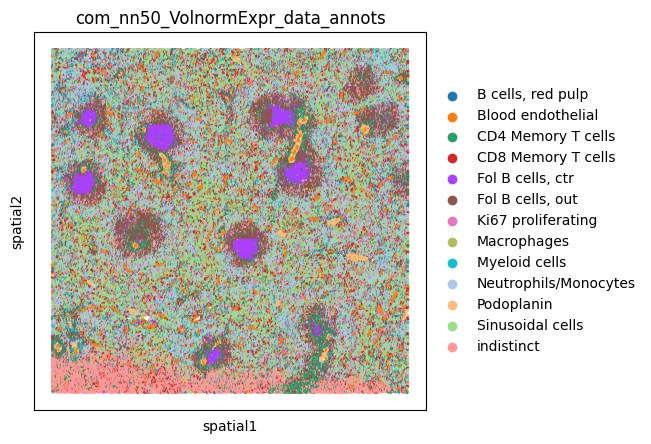

In [61]:
sq.pl.spatial_scatter(
        pkhl,
        shape=None,
        color = "com_nn50_VolnormExpr_data_annots",
        size=3
)

# co-occurance

In [62]:
sq.gr.co_occurrence(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2926/2926 [16:25<00:00,  2.97/s]


In [68]:
pkhl.uns["com_nn50_VolnormExpr_data_annots_co_occurrence"]['occ'][:,:,0]

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
      dtype=float32)

Not sure why the co_occurance values are returning nans. Something must be off with the data somehow?

try to work through the code like I did previously and maybe figure out where the error is

## check code

In [70]:
spatial = pkhl.obsm["spatial"].astype(fp)
original_clust = pkhl.obs["com_nn50_VolnormExpr_data_annots"]

In [71]:
spatial

array([[0.000e+00, 3.200e+01],
       [0.000e+00, 7.800e+01],
       [1.300e+01, 4.000e+00],
       ...,
       [9.407e+03, 8.722e+03],
       [9.385e+03, 8.962e+03],
       [9.385e+03, 9.071e+03]], dtype=float32)

In [72]:
original_clust

0              Sinusoidal cells
1                 Myeloid cells
2                 Myeloid cells
3              Sinusoidal cells
4         Neutrophils/Monocytes
                  ...          
154441    Neutrophils/Monocytes
154442         Sinusoidal cells
154443    Neutrophils/Monocytes
154444         Sinusoidal cells
154445       CD4 Memory T cells
Name: com_nn50_VolnormExpr_data_annots, Length: 154446, dtype: category
Categories (13, object): ['B cells, red pulp', 'Blood endothelial', 'CD4 Memory T cells', 'CD8 Memory T cells', ..., 'Neutrophils/Monocytes', 'Podoplanin', 'Sinusoidal cells', 'indistinct']

In [73]:
clust_map = {v: i for i, v in enumerate(original_clust.cat.categories.values)}
labs = np.array([clust_map[c] for c in original_clust], dtype=ip)
labs_unique = np.array(list(clust_map.values()), dtype=ip)

### interval

In [79]:
# _find_min_max
from sklearn.metrics import pairwise_distances
coord_sum = np.sum(spatial, axis=1)
min_idx, min_idx2 = np.argpartition(coord_sum, 2)[:2]
max_idx = np.argmax(coord_sum)
# fmt: off
thresh_max = pairwise_distances(spatial[min_idx, :].reshape(1, -1), spatial[max_idx, :].reshape(1, -1))[0, 0] / 2.0
thresh_min = pairwise_distances(spatial[min_idx, :].reshape(1, -1), spatial[min_idx2, :].reshape(1, -1))[0, 0]

In [81]:
interval = np.linspace(thresh_min, thresh_max, num=50, dtype=fp)
interval

array([  30.870699,  163.30319 ,  295.7357  ,  428.16818 ,  560.6007  ,
        693.0332  ,  825.4657  ,  957.8982  , 1090.3307  , 1222.7632  ,
       1355.1957  , 1487.6282  , 1620.0607  , 1752.4932  , 1884.9257  ,
       2017.3582  , 2149.7905  , 2282.2231  , 2414.6555  , 2547.0881  ,
       2679.5205  , 2811.9531  , 2944.3855  , 3076.818   , 3209.2505  ,
       3341.683   , 3474.1155  , 3606.548   , 3738.9805  , 3871.413   ,
       4003.8455  , 4136.278   , 4268.7104  , 4401.143   , 4533.5757  ,
       4666.008   , 4798.4404  , 4930.873   , 5063.3057  , 5195.738   ,
       5328.1704  , 5460.603   , 5593.0356  , 5725.468   , 5857.9004  ,
       5990.333   , 6122.7656  , 6255.1978  , 6387.6304  , 6520.063   ],
      dtype=float32)

In [82]:
# check:
pkhl.uns["com_nn50_VolnormExpr_data_annots_co_occurrence"]['interval']

array([  30.870699,  163.30319 ,  295.7357  ,  428.16818 ,  560.6007  ,
        693.0332  ,  825.4657  ,  957.8982  , 1090.3307  , 1222.7632  ,
       1355.1957  , 1487.6282  , 1620.0607  , 1752.4932  , 1884.9257  ,
       2017.3582  , 2149.7905  , 2282.2231  , 2414.6555  , 2547.0881  ,
       2679.5205  , 2811.9531  , 2944.3855  , 3076.818   , 3209.2505  ,
       3341.683   , 3474.1155  , 3606.548   , 3738.9805  , 3871.413   ,
       4003.8455  , 4136.278   , 4268.7104  , 4401.143   , 4533.5757  ,
       4666.008   , 4798.4404  , 4930.873   , 5063.3057  , 5195.738   ,
       5328.1704  , 5460.603   , 5593.0356  , 5725.468   , 5857.9004  ,
       5990.333   , 6122.7656  , 6255.1978  , 6387.6304  , 6520.063   ],
      dtype=float32)

### splits

In [83]:
# we get 76 splits so just stick with this:
n_splits = 76

KeyError: 'y'

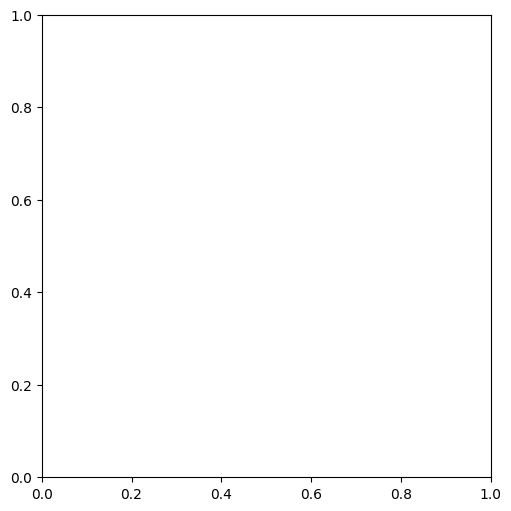

In [41]:
for ct in np.unique(pkhl.obs["com_nn50_VolnormExpr_data_annots"]):
    sq.pl.co_occurrence(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", clusters=ct)

In [42]:
np.unique(pkhl.obs["com_nn50_VolnormExpr_data_annots"])

array(['B cells, red pulp', 'Blood endothelial', 'CD4 Memory T cells',
       'CD8 Memory T cells', 'Fol B cells, ctr', 'Fol B cells, out',
       'Ki67 proliferating', 'Macrophages', 'Myeloid cells',
       'Neutrophils/Monocytes', 'Podoplanin', 'Sinusoidal cells',
       'indistinct'], dtype=object)

In [36]:
pkhl

AnnData object with n_obs × n_vars = 154446 × 28
    obs: 'C0', 'x', 'y', 'cellarea', 'com_nn50_VolnormExpr_data_annots'
    uns: 'com_nn50_VolnormExpr_data_annots_colors', 'com_nn50_VolnormExpr_data_annots_co_occurrence'
    obsm: 'spatial'

# Spatial Neighbors

In [43]:
sq.gr.spatial_neighbors(pkhl, delaunay=False, coord_type="generic", key_added="nn6") ## 6 by default
sq.gr.spatial_neighbors(pkhl, delaunay=True, coord_type="generic", key_added="delaunay")
sq.gr.spatial_neighbors(pkhl, delaunay=False, radius=30, coord_type="generic", key_added="r30")
sq.gr.spatial_neighbors(pkhl, delaunay=False, radius=50, coord_type="generic", key_added="r50")
sq.gr.spatial_neighbors(pkhl, delaunay=False, radius=100, coord_type="generic", key_added="r100")
sq.gr.spatial_neighbors(pkhl, delaunay=False, radius=200, coord_type="generic", key_added="r200")

## nn6

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.02/s]


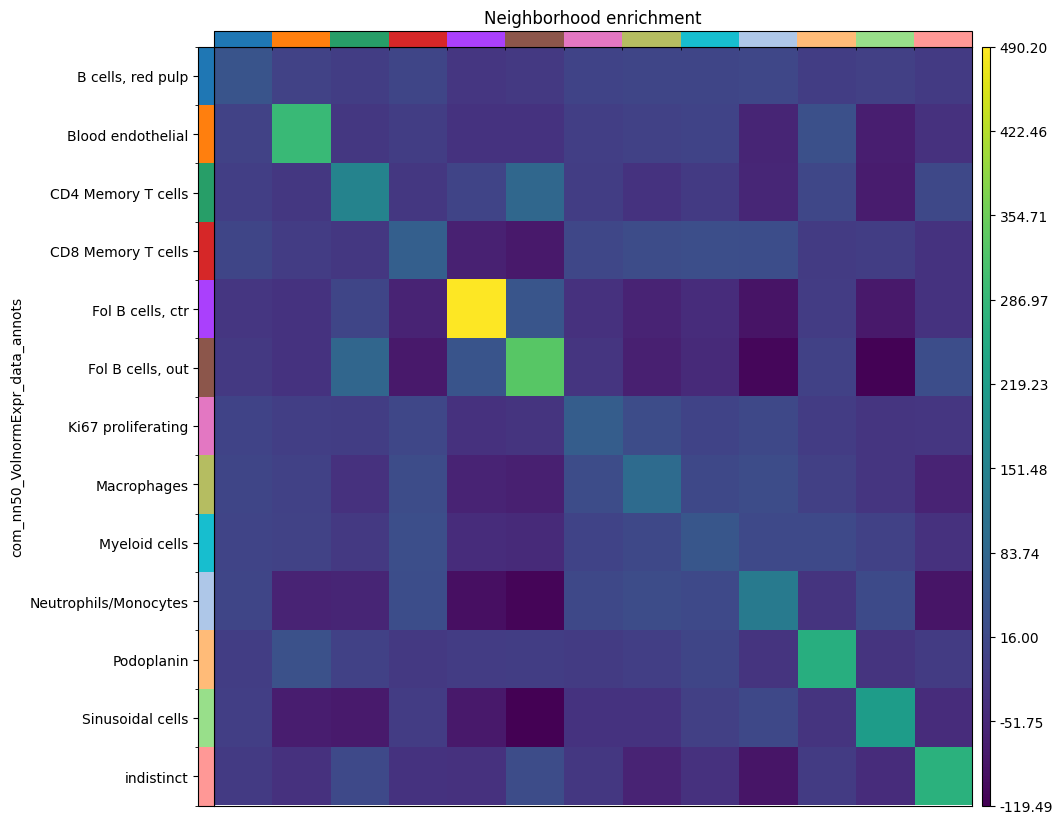

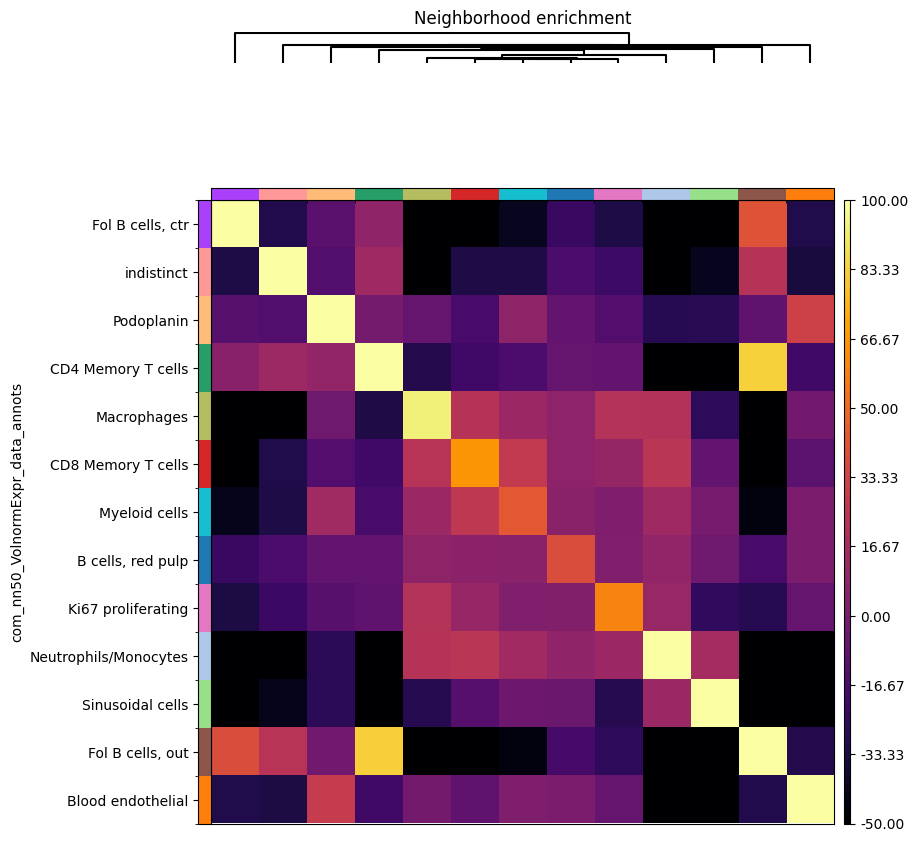

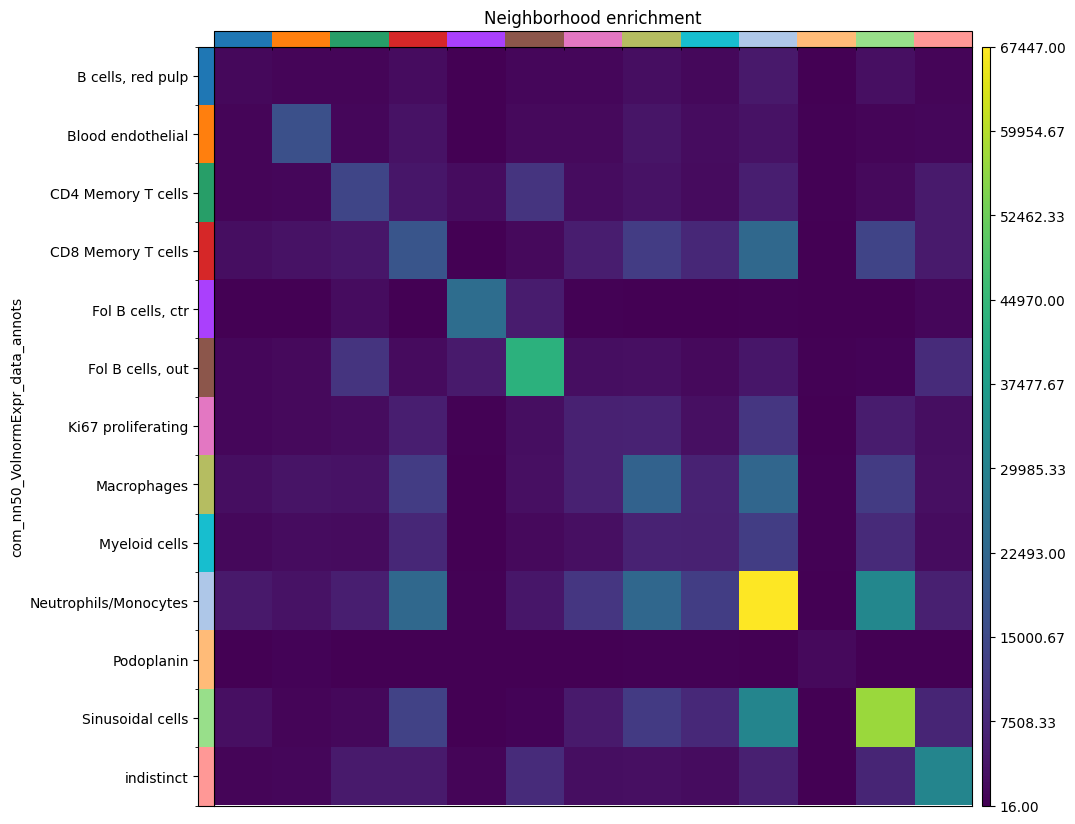

In [44]:
sq.gr.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="nn6")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="count")

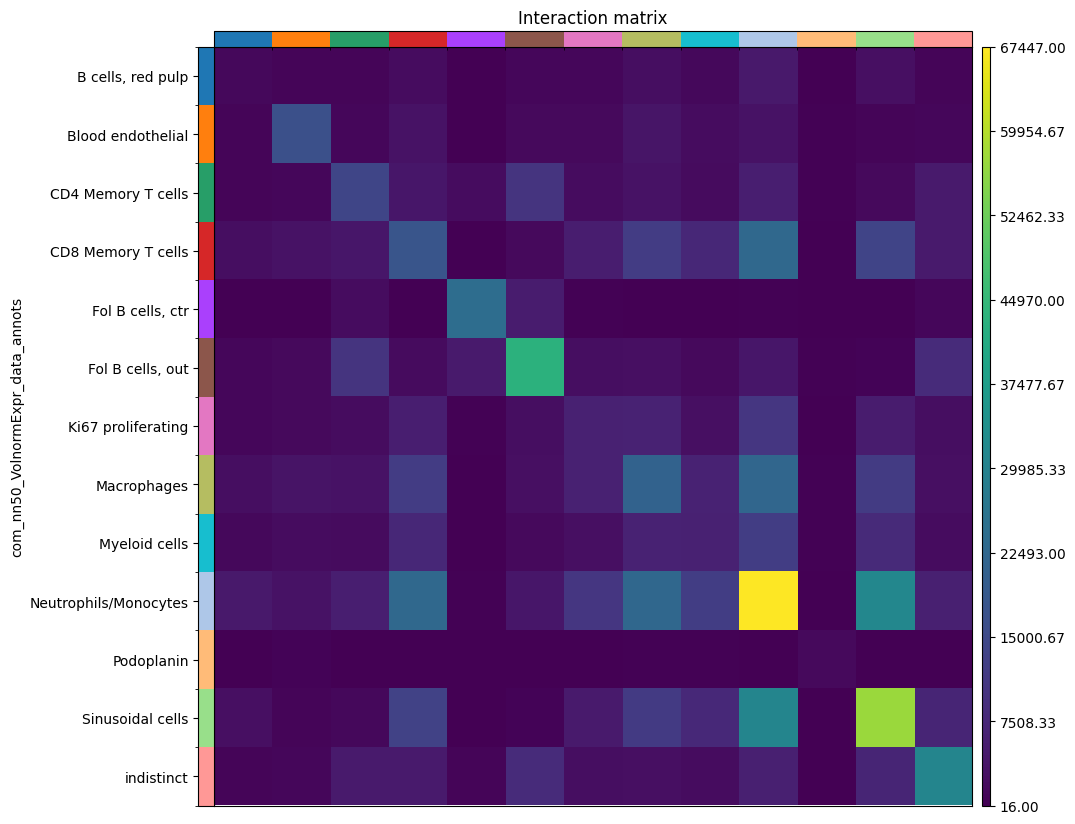

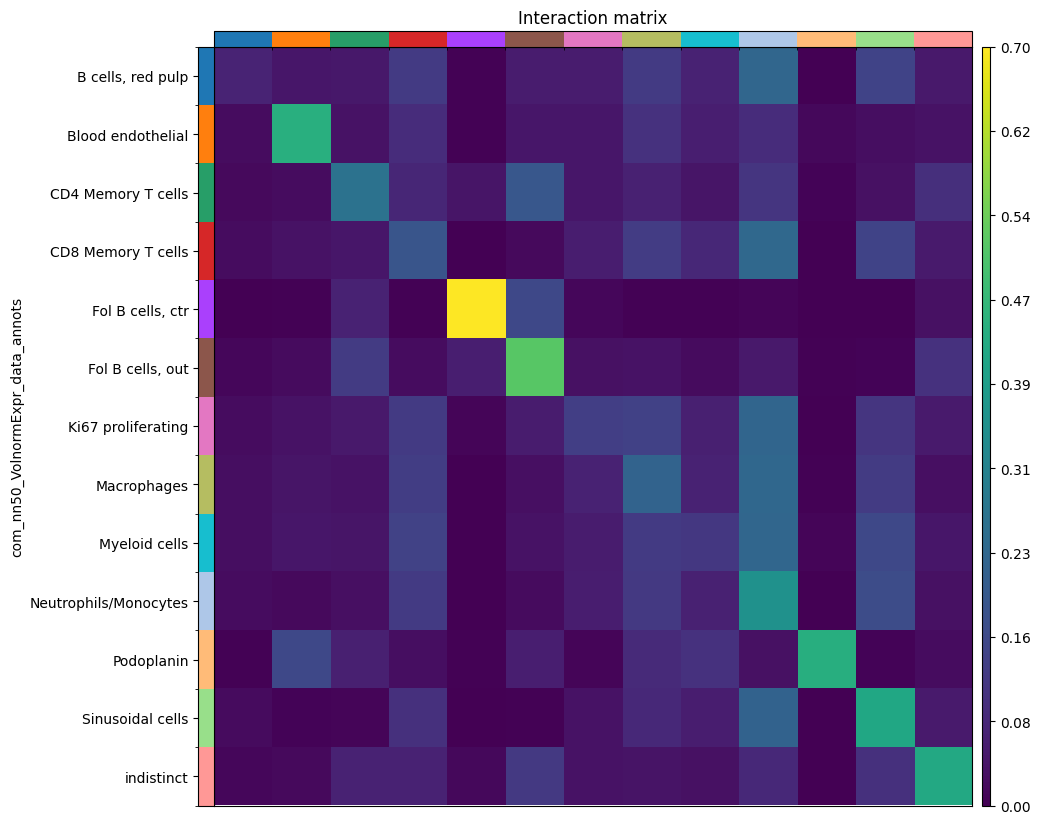

In [45]:
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="nn6")
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="nn6", normalized=True)
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")

## delaunay

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.71/s]


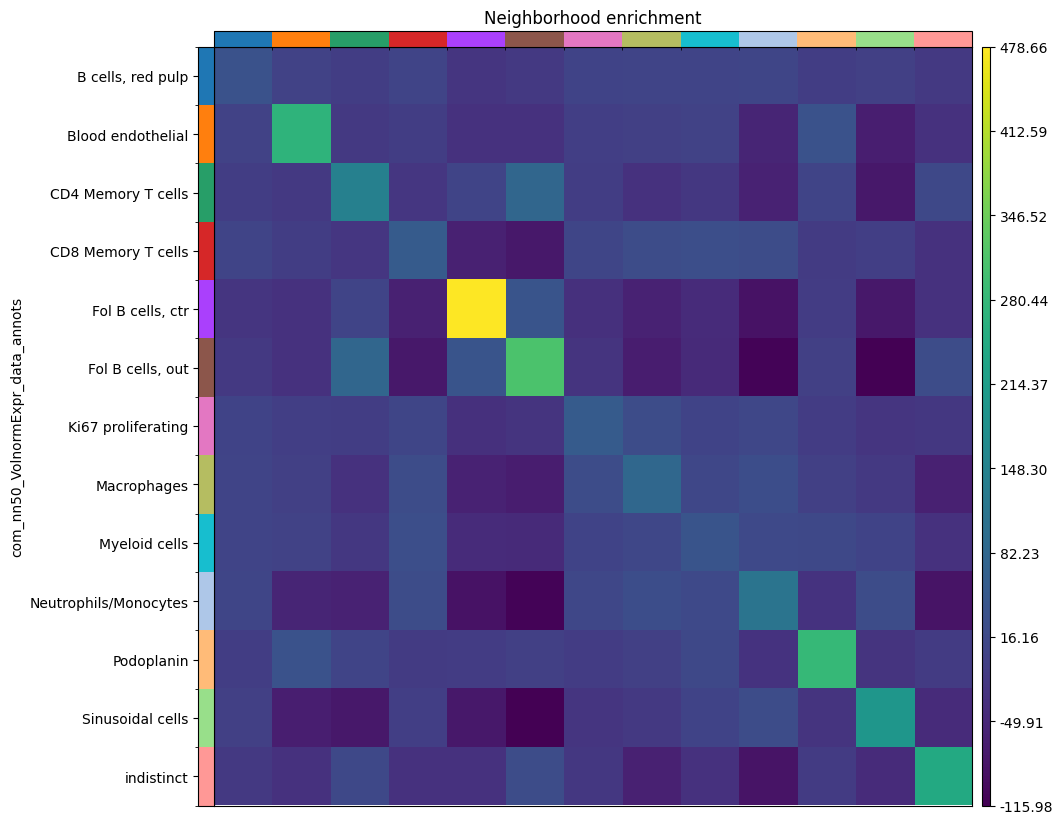

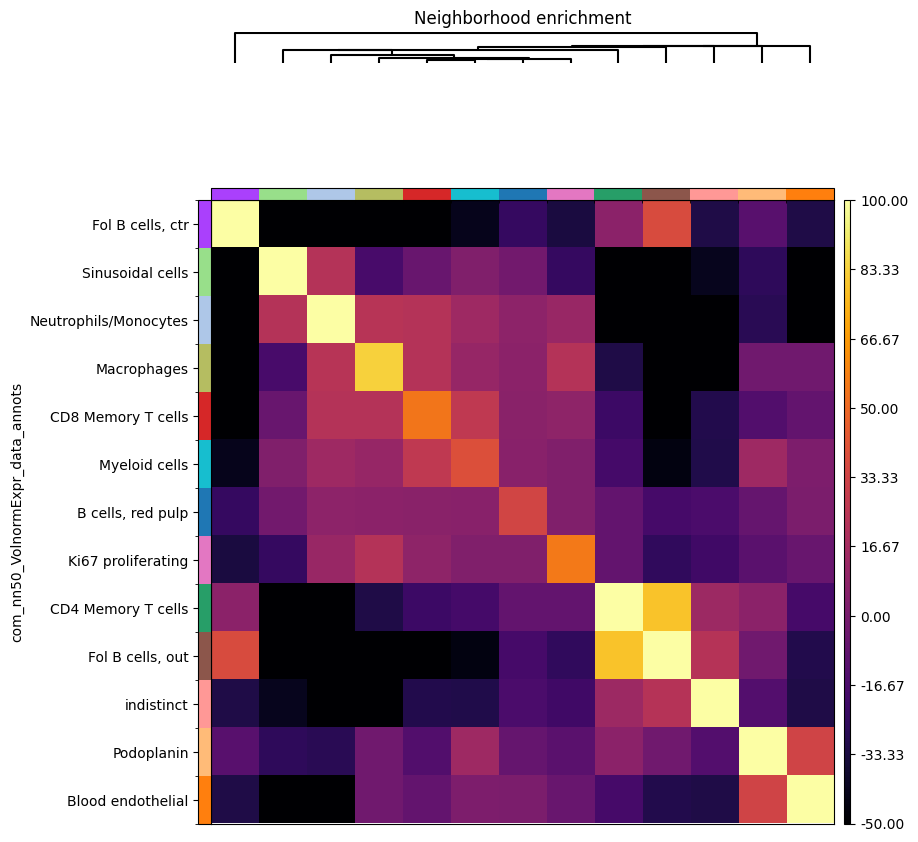

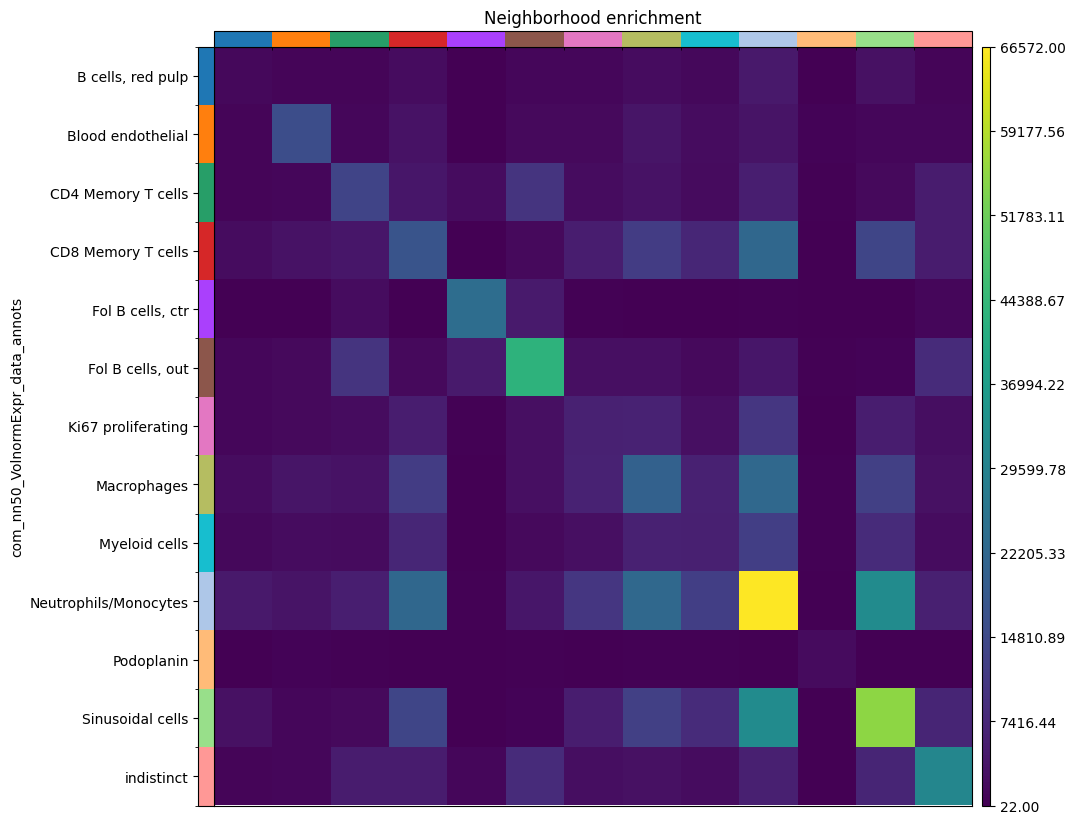

In [46]:
sq.gr.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="delaunay")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="count")

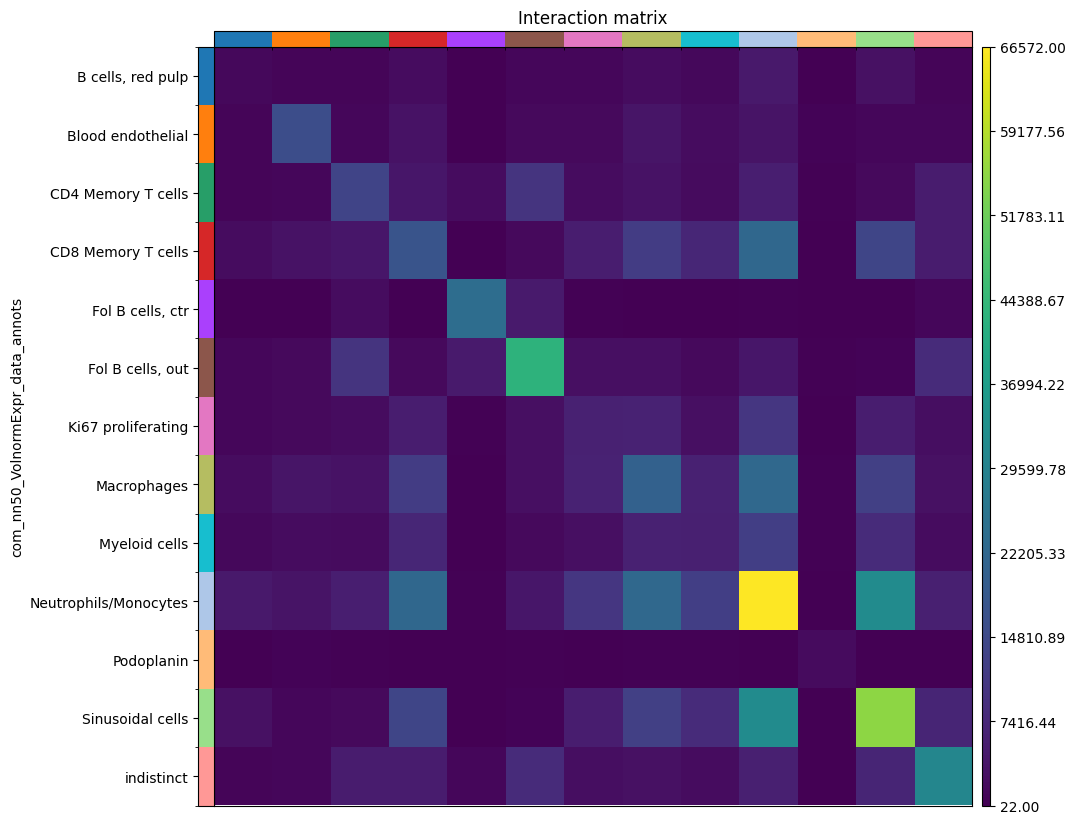

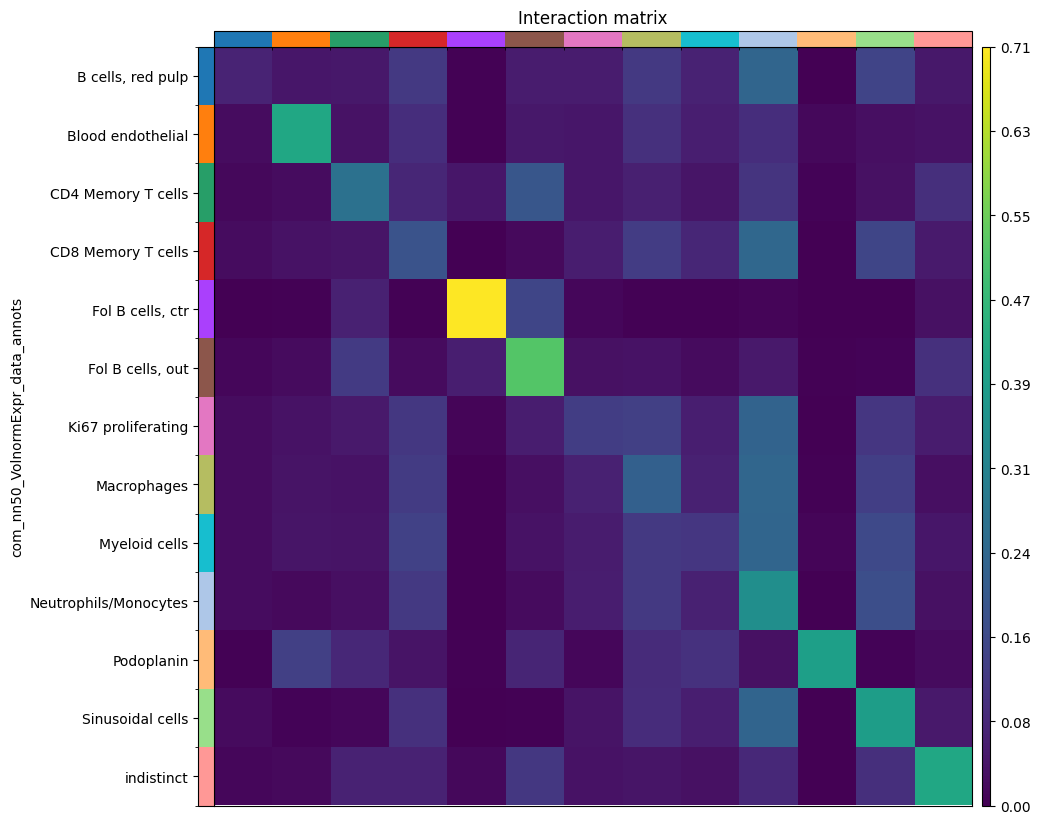

In [47]:
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="delaunay")
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="delaunay", normalized=True)
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")

## r30

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 72.84/s]


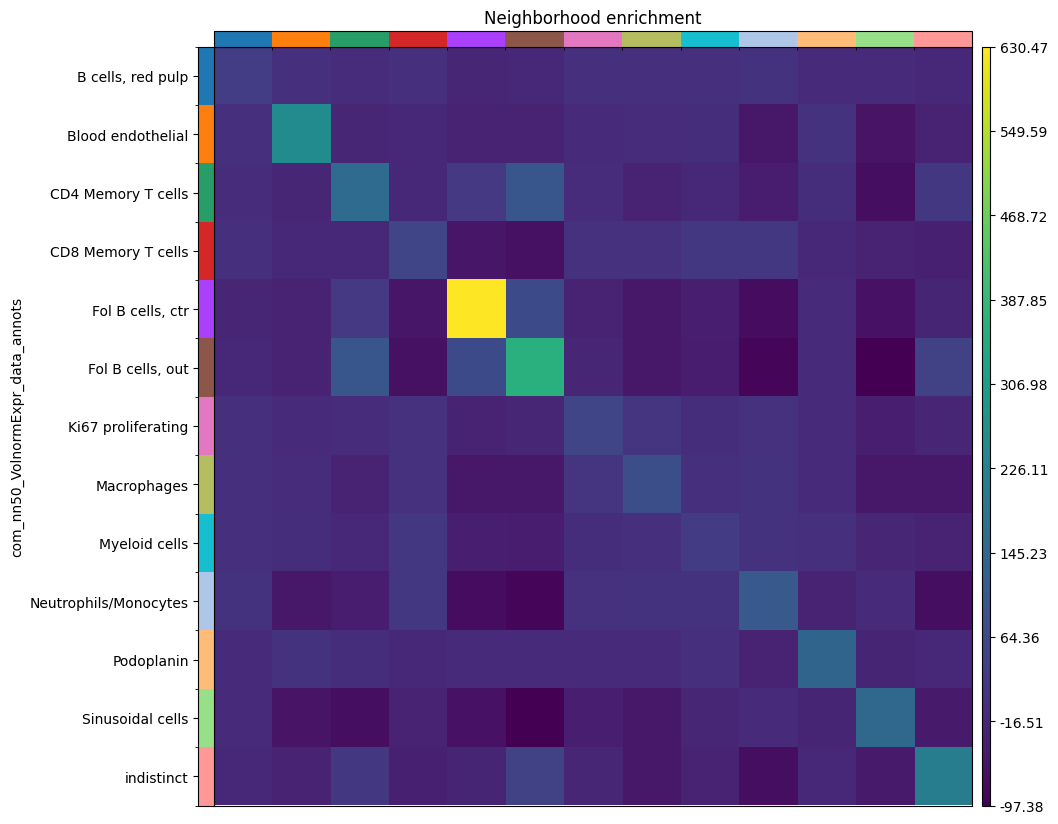

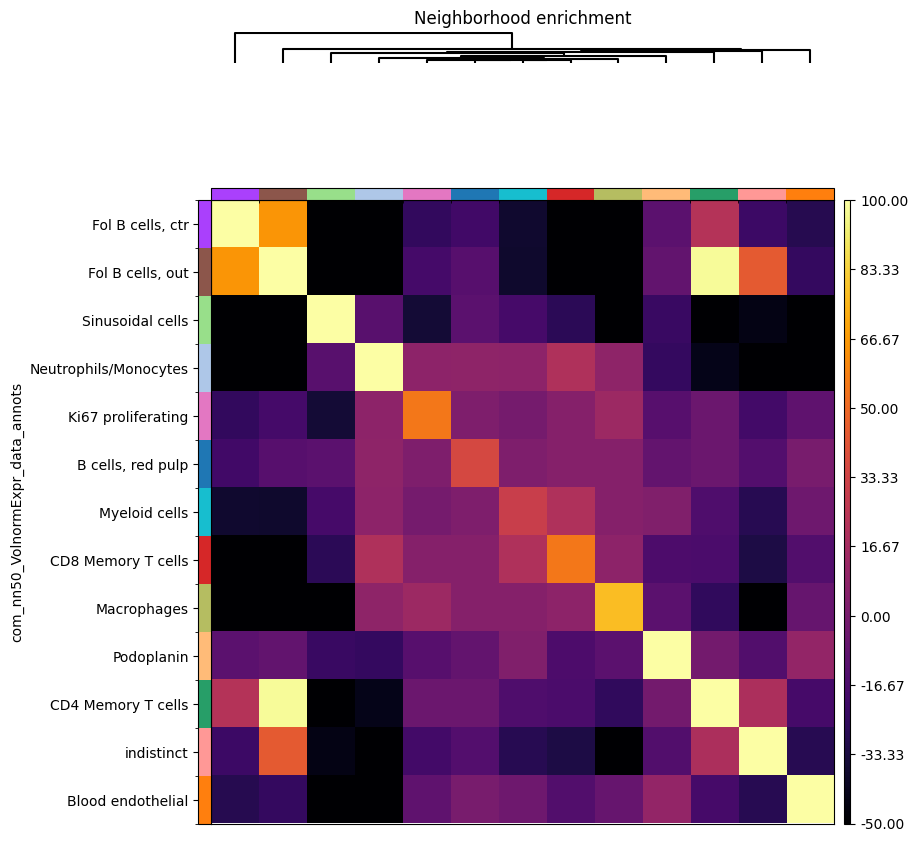

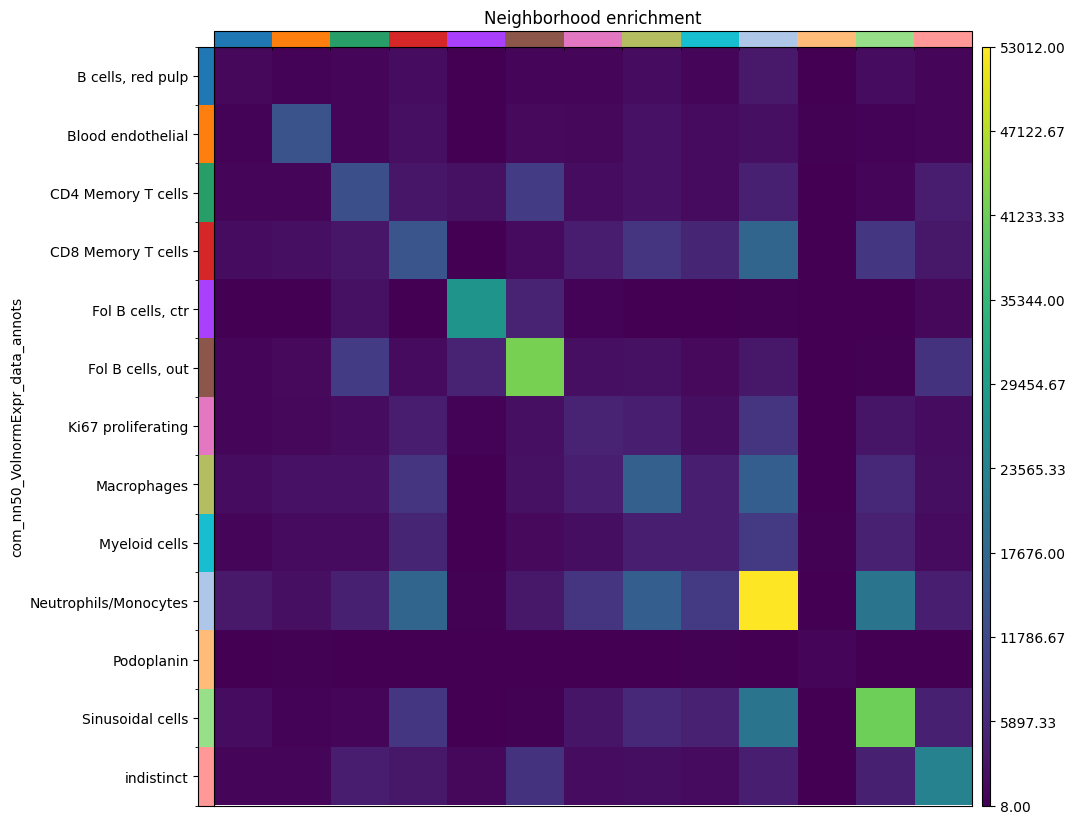

In [48]:
sq.gr.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r30")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="count")

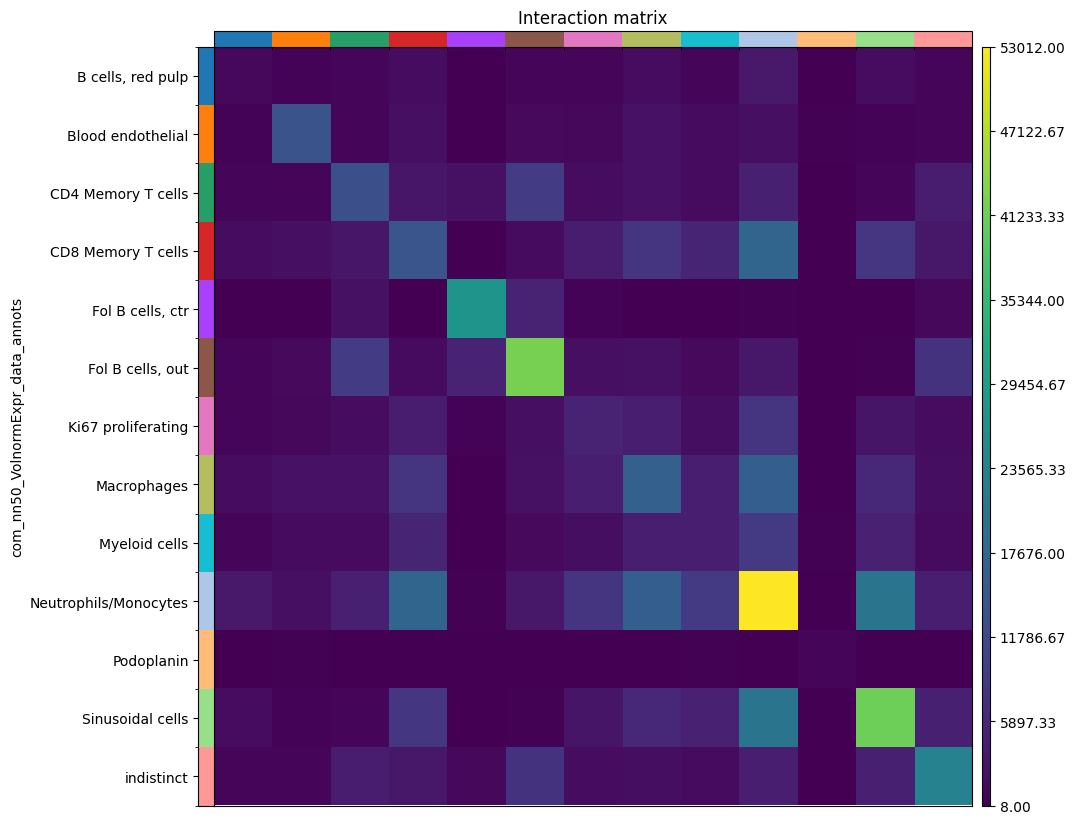

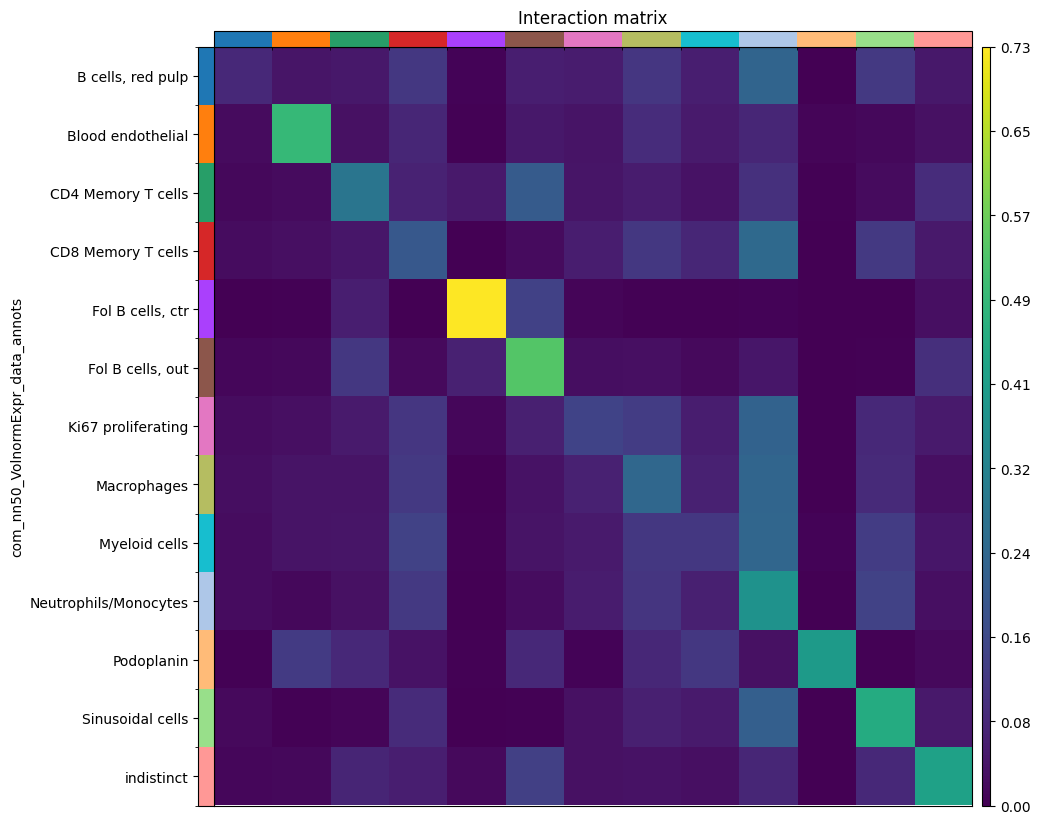

In [49]:
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r30")
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r30", normalized=True)
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")

## r50

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.11/s]


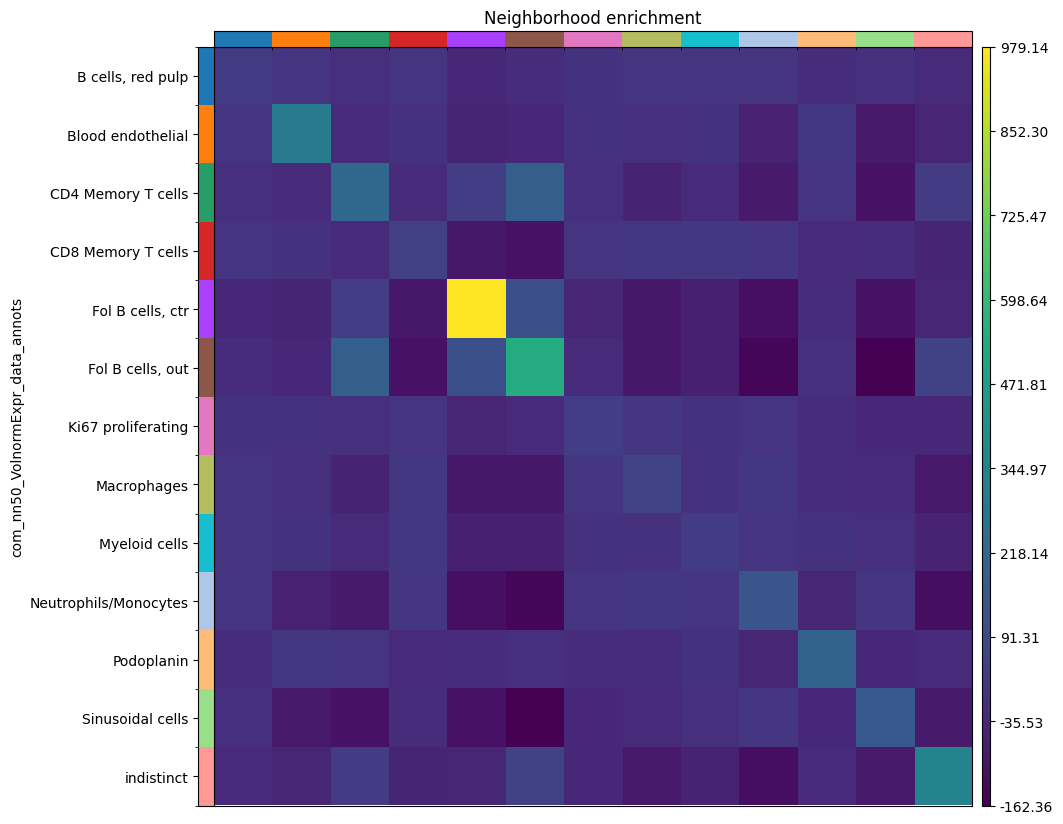

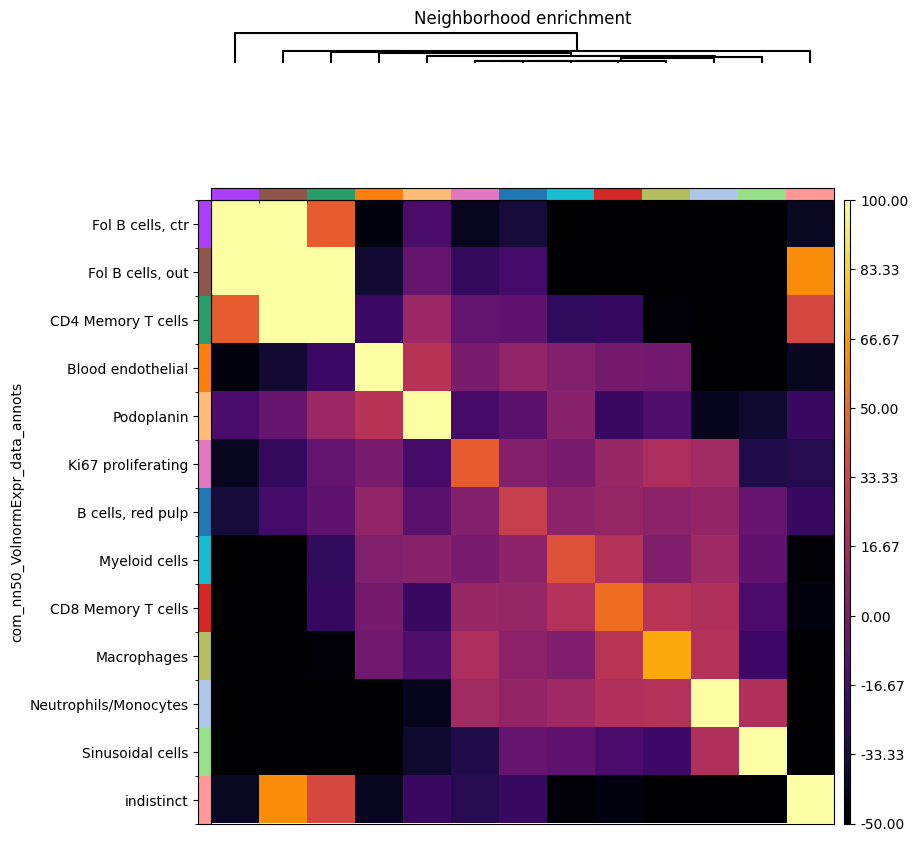

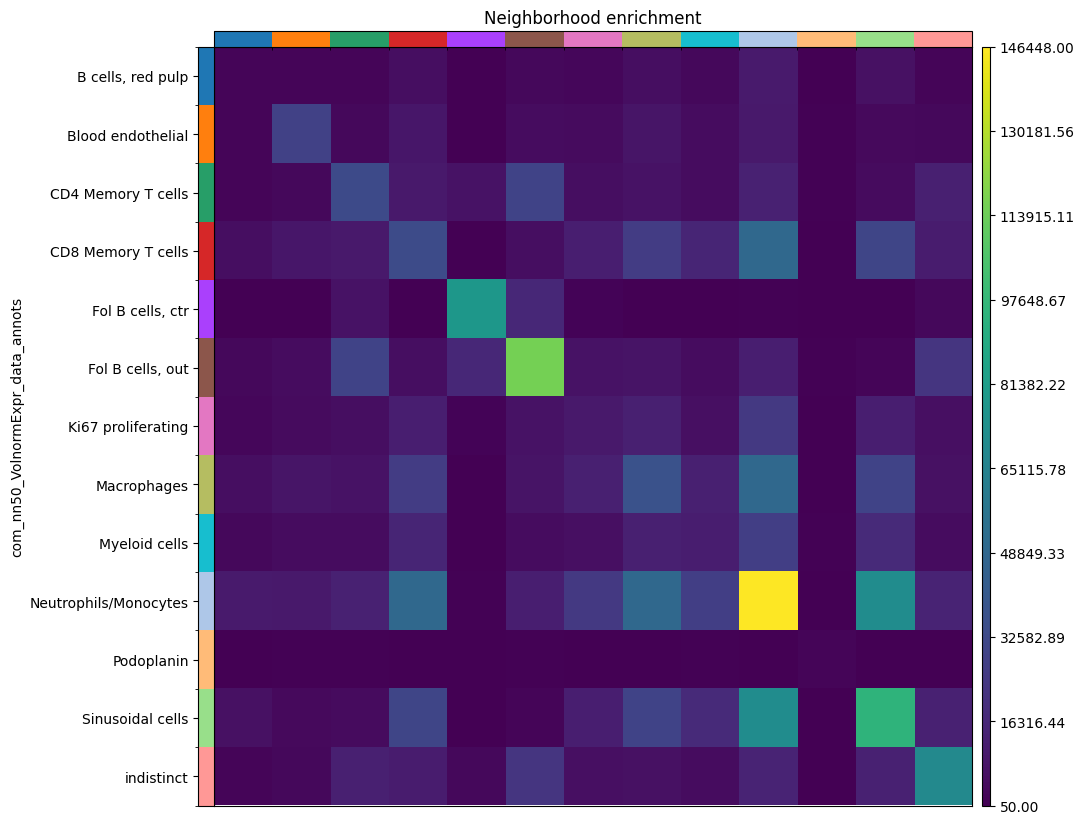

In [50]:
sq.gr.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r50")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="count")

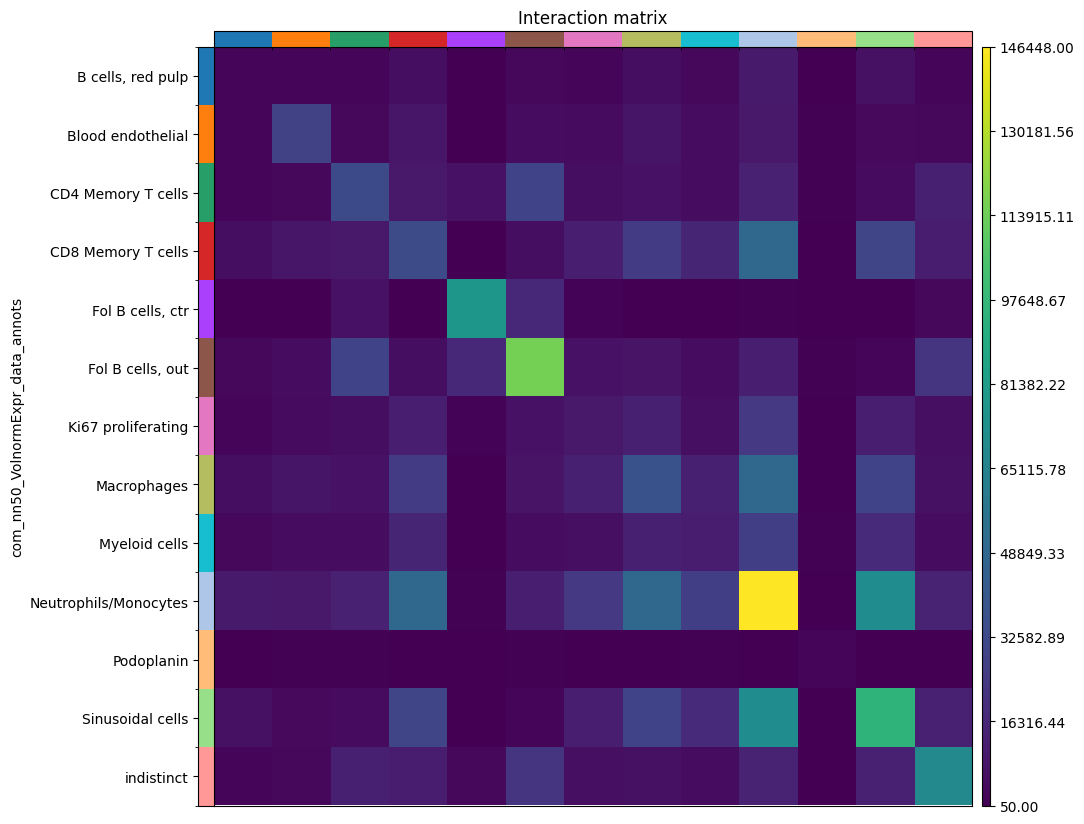

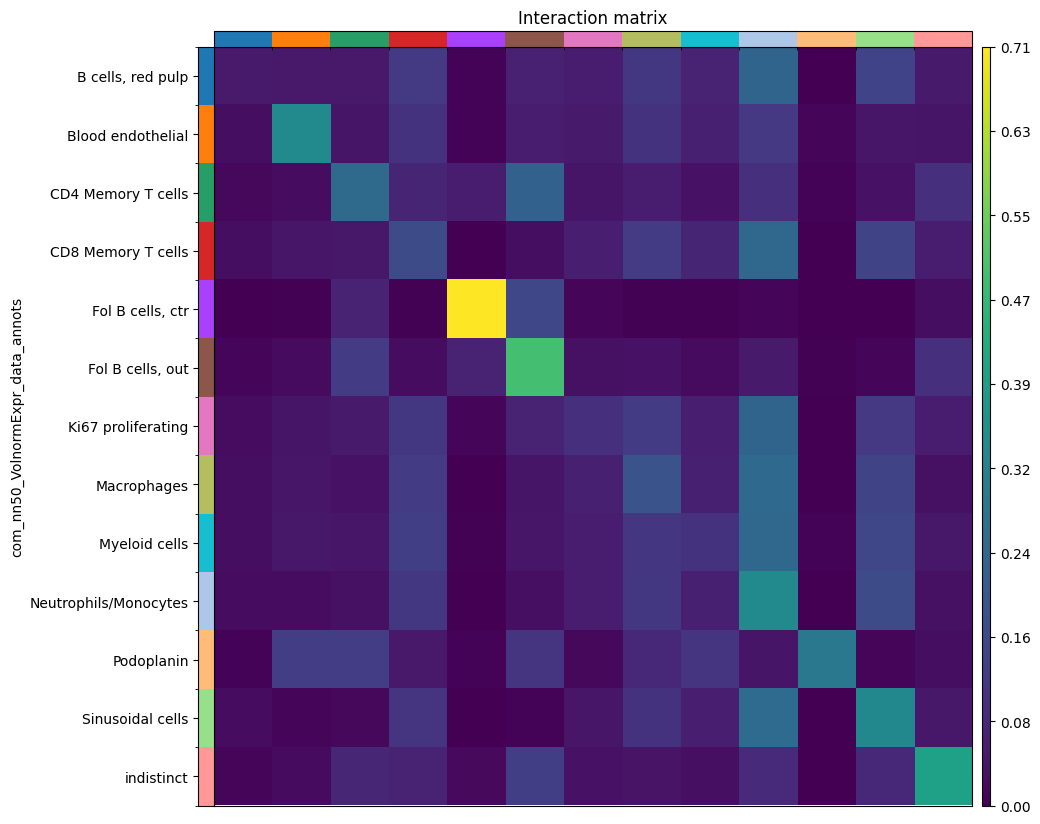

In [51]:
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r50")
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r50", normalized=True)
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")

## r100

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.03/s]


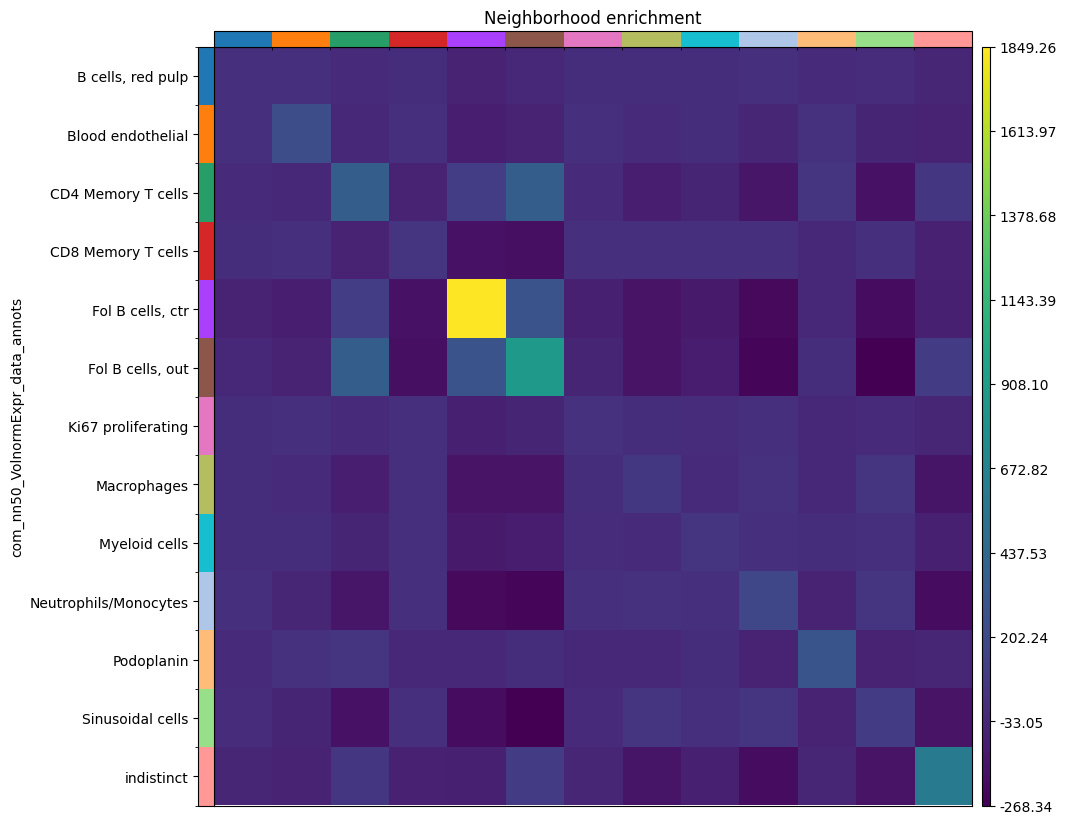

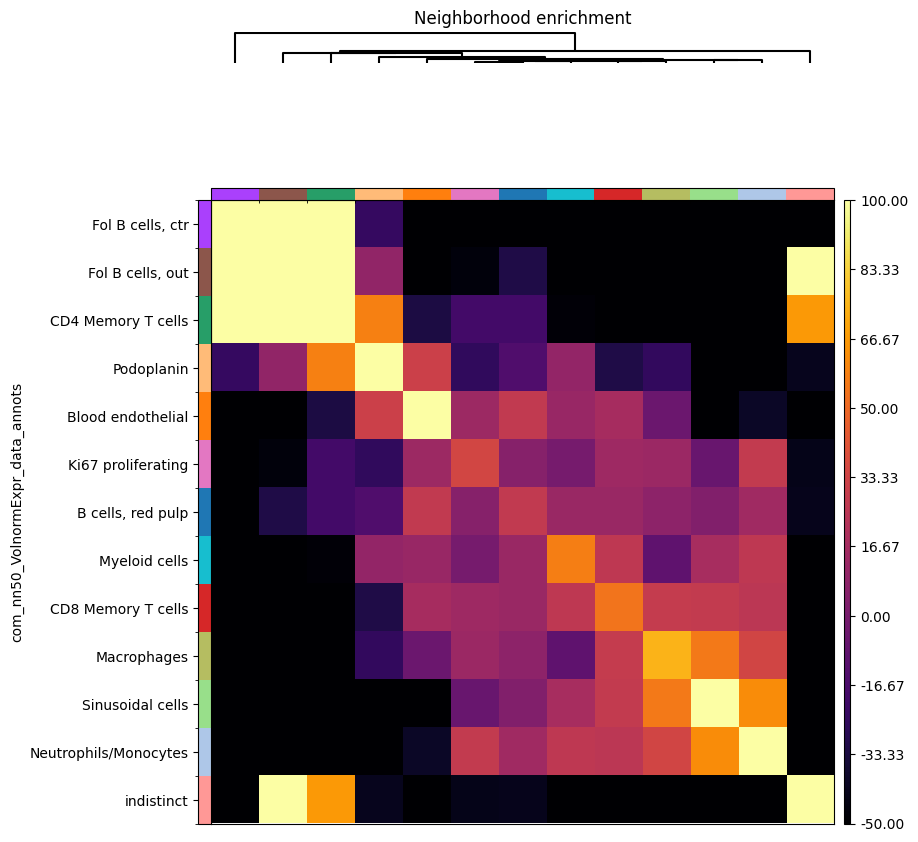

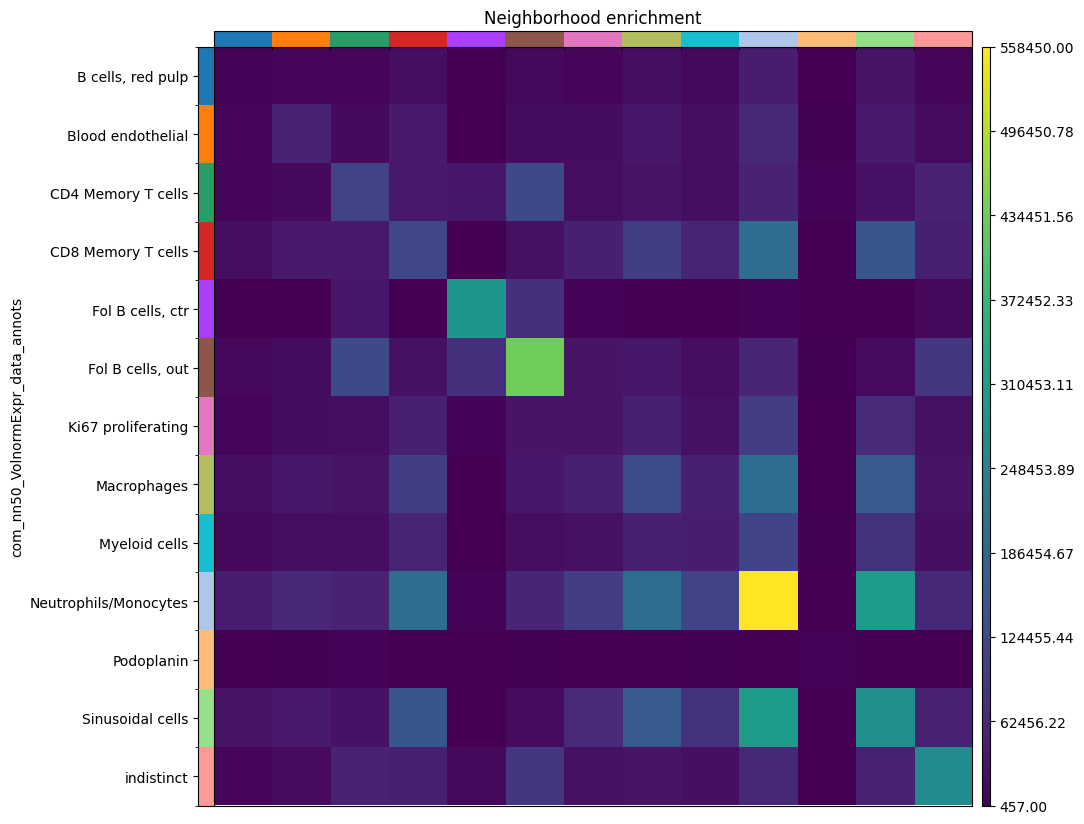

In [52]:
sq.gr.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r100")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="count")

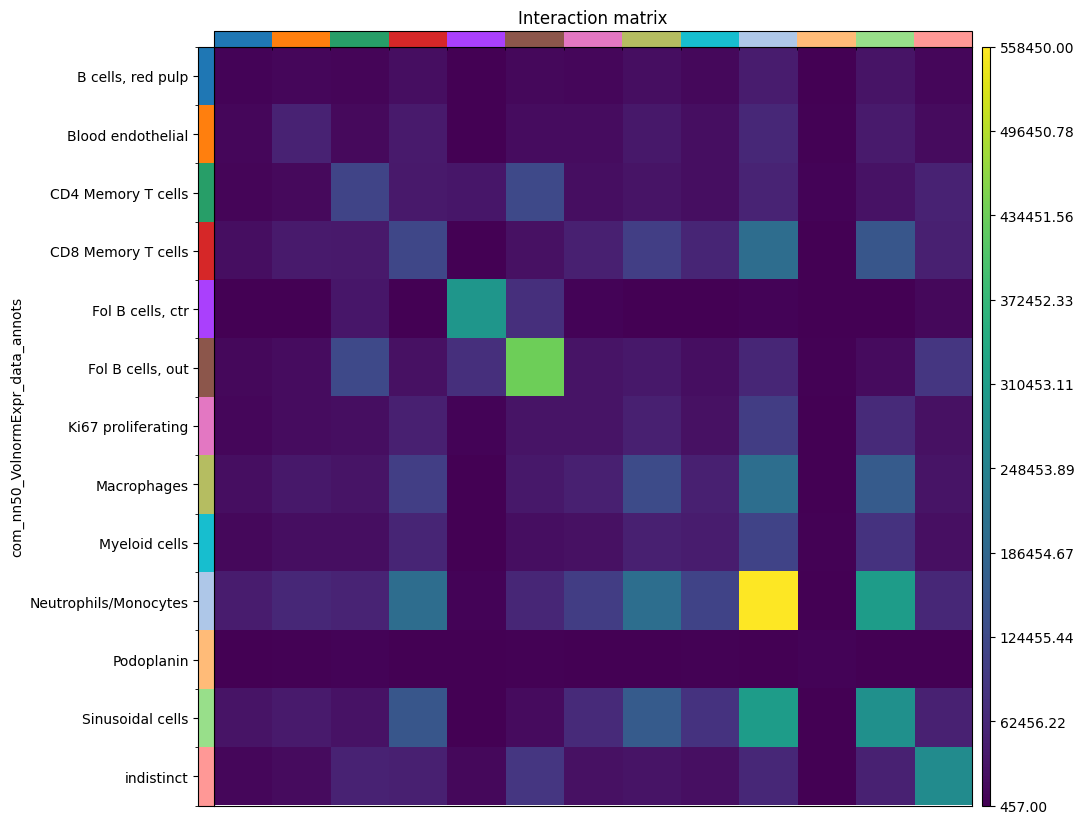

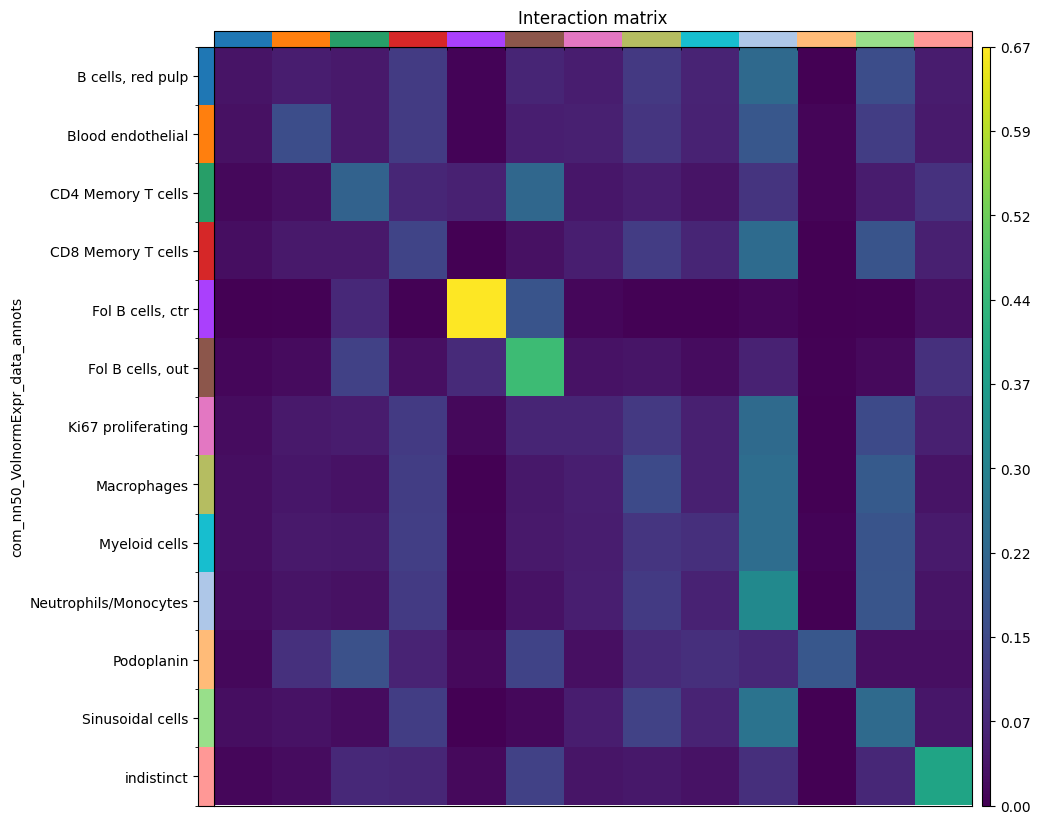

In [53]:
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r100")
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r100", normalized=True)
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")

## r200

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 24.30/s]


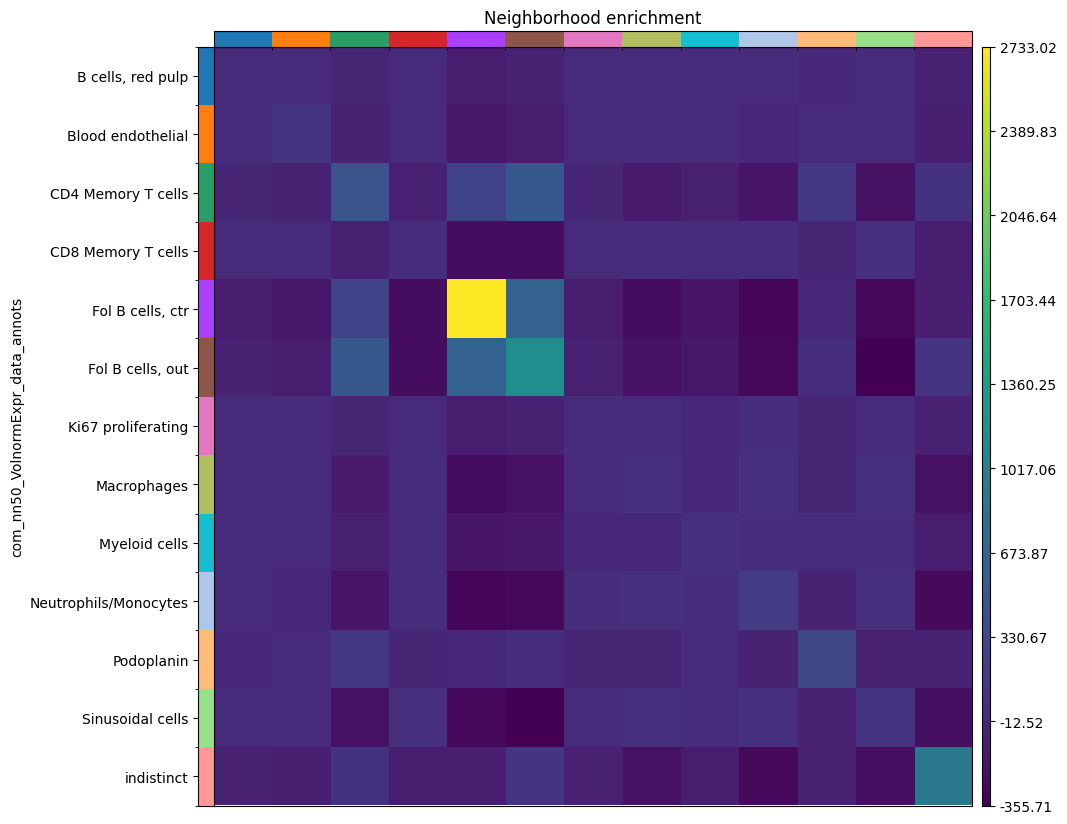

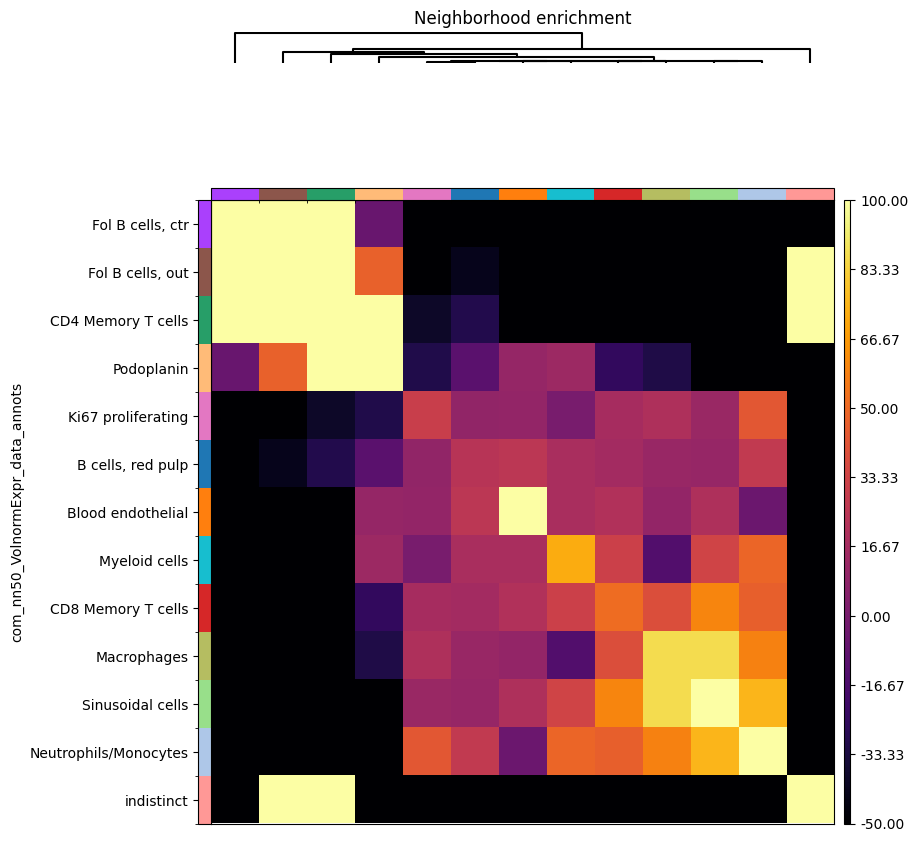

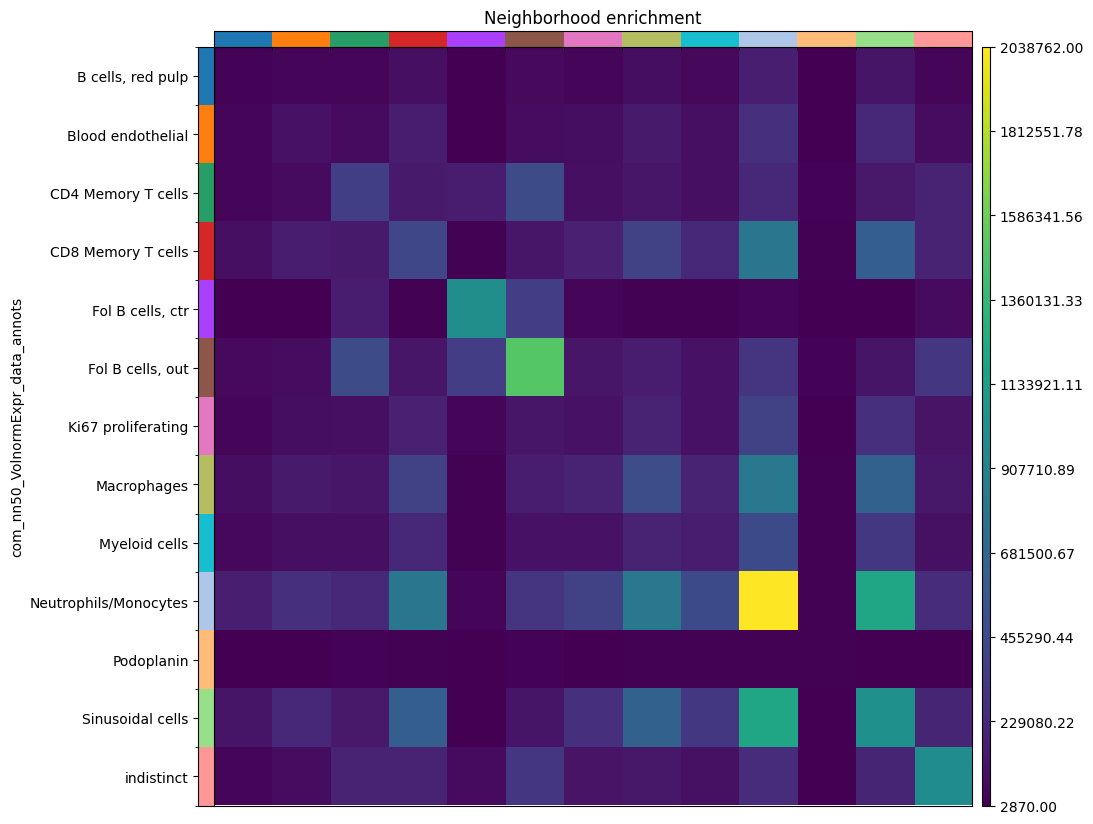

In [54]:
sq.gr.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r200")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore")
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="zscore", method="single", cmap="inferno", vmin=-50, vmax=100)
sq.pl.nhood_enrichment(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", mode="count")

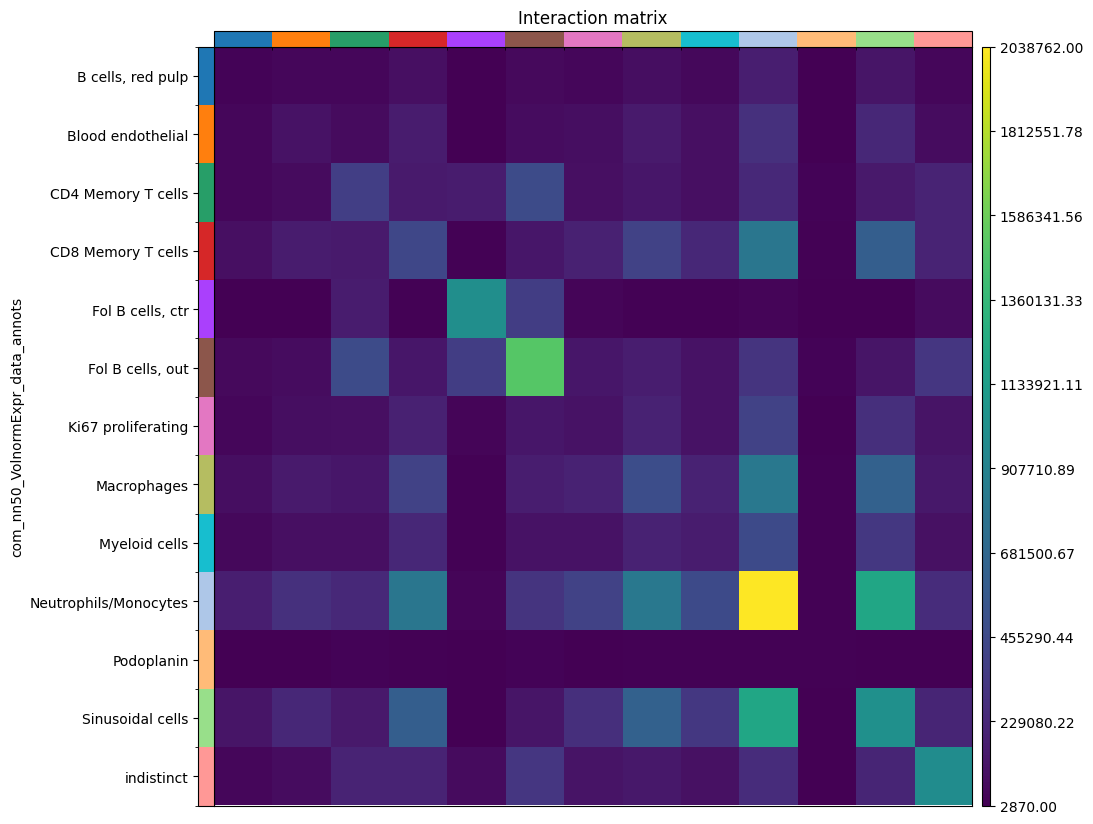

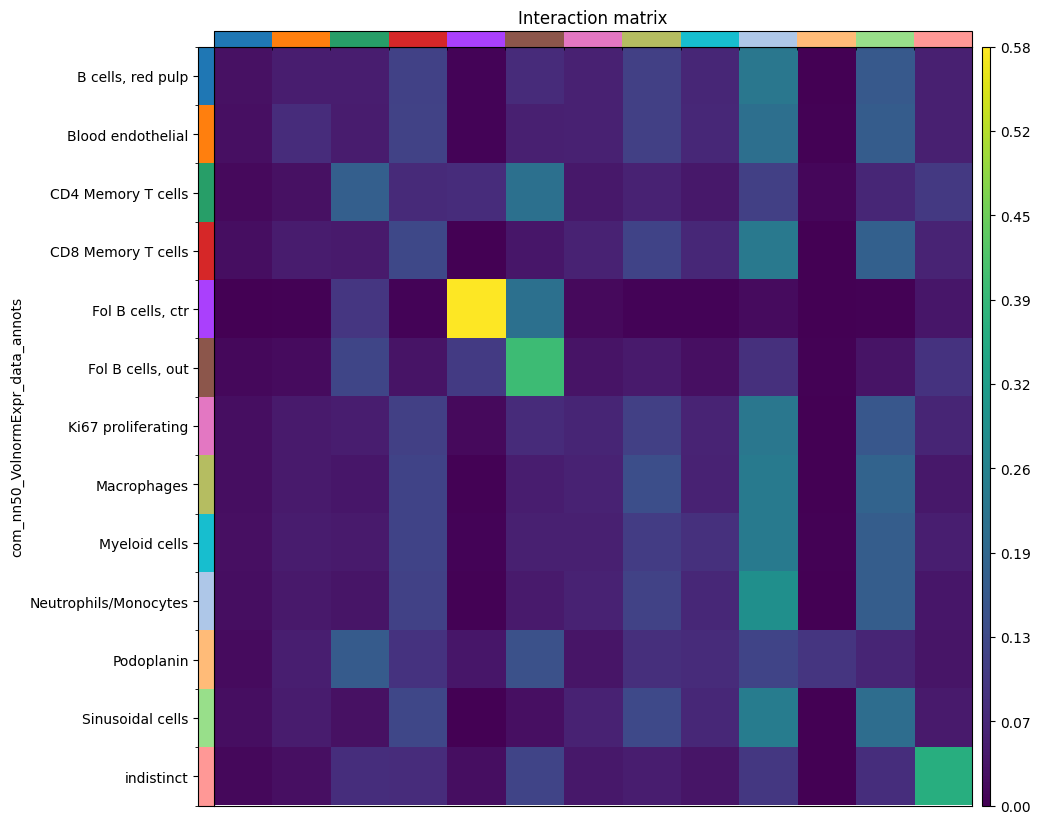

In [55]:
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r200")
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")
sq.gr.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots", connectivity_key="r200", normalized=True)
sq.pl.interaction_matrix(pkhl, cluster_key="com_nn50_VolnormExpr_data_annots")